In [ ]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

- SKU
- Name
- Brand
- Average rating
- rating count
- sponsored
- price
- sales price
- express
- rank
- link

In [ ]:
product_urls = []
product_name = []
brands = []
avg_ratings = []
ratings_count = []
sponsored = []
sales_prices = []
prices = []
express = []
ranks = []
categories = []
links = []
SKU = []
BestSellers = []
Discounts = []
Extra_discounts = []

In [ ]:
for i in range(20):
  url = f"https://www.noon.com/uae-en/sports-and-outdoors/?isCarouselView=false&limit=50&page={i}&sort%5Bby%5D=popularity&sort%5Bdir%5D=desc"
  webpage = requests.get(url).text
  soup = BeautifulSoup(webpage, 'html.parser')
  product = soup.find_all('div', class_="sc-57fe1f38-0")
  for container in product:
    # Product name
    product_divs = container.find('div', class_="sc-95ea18ef-25")
    product_name.append(product_divs.get('title'))

    # brand name
    anchor_tag = container.find("a", href=True)
    if anchor_tag:
      product_url = "https://www.noon.com" + anchor_tag['href']
    product_response = requests.get(product_url)
    if product_response.status_code != 200:
      brands.append(None)
      continue
    product_soup = BeautifulSoup(product_response.content, "html.parser")

    brand_element = product_soup.find('div', class_="sc-e0554f58-21")
    if brand_element:
      brands.append(brand_element.text.strip())
    else:
      brands.append(product_divs.get('title').split()[0])

    # Average rating
    rating = container.find('div', class_="sc-9cb63f72-2")
    if rating:
      avg_ratings.append(rating.text)
    else:
      avg_ratings.append(rating)

    # ratings count
    rating_count = container.find('div', class_='sc-9cb63f72-4')
    if rating_count:
      result_count = rating_count.find('span', class_='sc-9cb63f72-5').text
      ratings_count.append(result_count)

    else:
      ratings_count.append(rating_count)

    # sponsored
    sponsor = container.find('div', class_="sc-95ea18ef-24")
    if sponsor:
      sponsored.append("Yes")
    else:
      sponsored.append("No")

    # Sales price
    sale_price = container.find('div', class_="sc-97957b12-1")
    if sale_price:
      res = sale_price.find('strong').text
      sales_prices.append(res)
    else:
      sales_prices.append(sale_price)

    # Prices
    price = container.find('div', class_='sc-97957b12-2')
    if price:
      res = price.find('span', class_='oldPrice').text
      prices.append(res)
    else:
      prices.append(price)

    # Express
    exp_div = container.find('div', class_='sc-d376b94d-3')
    if exp_div:
      if "express" in exp_div.find('img', 'sc-92fbb12b-1')["src"]:
        express.append('y')
      else:
        express.append('n')
    else:
      express.append('n')

    # ranks
    rank_div = container.find('div', class_='sc-4d61bf64-3')
    if rank_div:
      if rank_div.find('span', 'sc-4d61bf64-5'):
        res = rank_div.find('span', 'sc-4d61bf64-5').text
        if res.startswith('#'):
          res_lst = res[1:].split(' in ')
          ranks.append(res_lst[0])
          categories.append(res_lst[1])

        else:
          ranks.append(None)
          categories.append(None)
      else:
        ranks.append(None)
        categories.append(None)
    else:
      ranks.append(None)
      categories.append(None)

    # Links
    link_div = container.find('a')
    if link_div:
      product_url = "https://www.noon.com" + link_div['href']
      links.append(product_url)
    else:
      links.append('None')

    # SKU's
    sku_div = container.find('a')
    if sku_div:
      SKU.append(sku_div['id'].split('-')[1])
    else:
      SKU.append(None)

    # Best Sellers
    seller_div = container.find('div', class_='sc-7527cf22-0')
    if seller_div:
      BestSellers.append(seller_div.find('span').text)
    else:
      BestSellers.append("None")

    # Discounts
    discount_div = container.find('div', class_='sc-97957b12-2')
    if discount_div:
      if discount_div.find('span', class_='discount'):
        Discounts.append(discount_div.find('span', class_='discount').text)
      else:
        Discounts.append(None)
    else:
      Discounts.append(None)

    # Extra Discounts
    extra_div = container.find('div', class_='sc-50267c21-1')
    if extra_div:
      if extra_div.find('span', class_='sc-ef2adf09-7'):
        res = extra_div.find('span', class_='sc-ef2adf09-7').text
        if res.startswith('Extra'):
          Extra_discounts.append(res)
        else:
          Extra_discounts.append(None)
      else:
        Extra_discounts.append(None)
    else:
      Extra_discounts.append(None)


In [ ]:
print("product_name:", len(product_name))
print("brands:", len(brands))
print("avg_ratings:", len(avg_ratings))
print("ratings_count:", len(ratings_count))
print("sponsored:", len(sponsored))
print("sales_prices:", len(sales_prices))
print("prices:", len(prices))
print("express:", len(express))
print("ranks:", len(ranks))
print("categories:", len(categories))
print("links:", len(links))
print("SKU:", len(SKU))
print("BestSellers:", len(BestSellers))
print("Discounts:", len(Discounts))
print("Extra_discounts:", len(Extra_discounts))



product_name: 1340
brands: 1340
avg_ratings: 1340
ratings_count: 1340
sponsored: 1340
sales_prices: 1340
prices: 1340
express: 1340
ranks: 1340
categories: 1340
links: 1340
SKU: 1340
BestSellers: 1340
Discounts: 1340
Extra_discounts: 1340


In [ ]:
print("product_name:", len(product_name))
print("brands:", len(brands))
print("avg_ratings:", len(avg_ratings))
print("ratings_count:", len(ratings_count))
print("sponsored:", len(sponsored))
print("sales_prices:", len(sales_prices))
print("prices:", len(prices))
print("express:", len(express))
print("ranks:", len(ranks))
print("categories:", len(categories))
print("links:", len(links))
print("SKU:", len(SKU))
print("BestSellers:", len(BestSellers))
print("Discounts:", len(Discounts))
print("Extra_discounts:", len(Extra_discounts))


data = {
    "Product_name": product_name,
    "Brand": brands,
    "Avg_ratings": avg_ratings,
    "Ratings_count": ratings_count,
    "Sponsored": sponsored,
    "Sale_price": sales_prices,
    "Price": prices,
    "Express": express,
    "Ranks": ranks,
    "Categories": categories,
    "Links": links,
    "SKU": SKU,
    "BestSellers": BestSellers,
    "Discounts": Discounts,
    "Extra_discounts": Extra_discounts,
}

product_name: 1340
brands: 1340
avg_ratings: 1340
ratings_count: 1340
sponsored: 1340
sales_prices: 1340
prices: 1340
express: 1340
ranks: 1340
categories: 1340
links: 1340
SKU: 1340
BestSellers: 1340
Discounts: 1340
Extra_discounts: 1340


In [ ]:
df = pd.DataFrame(data)
df.to_csv("scraped_data.csv", index=False)

In [ ]:
df.head()

,Product_name,Brand,Avg_ratings,Ratings_count,Sponsored,Sale_price,Price,Express,Ranks,Categories,Links,SKU,BestSellers,Discounts,Extra_discounts
0,"S2C Stainless Steel Water Bottle 1L,32oz Doubl...",S2C,None,None,Yes,38.75,55.95,y,None,None,https://www.noon.com/uae-en/stainless-steel-wa...,ZFCBAF1F12EB34C584481Z,None,30% Off,None
1,S2C S2C 1200ML Insulated Water Bottle with 3 L...,S2C,None,None,Yes,40.75,75,y,None,None,https://www.noon.com/uae-en/s2c-1200ml-insulat...,Z96FB09B6FE2B6C3671E0Z,None,45% Off,None
2,Sparnod Fitness Sparnod Fitness SPT-70 7FT Bil...,Sparnod Fitness,None,None,Yes,"1,599","3,000",y,None,None,https://www.noon.com/uae-en/sparnod-fitness-sp...,ZC88B95EF8903D46F5FAFZ,None,46% Off,None
3,Optimum Nutrition Gold Standard 100% Whey Prot...,Optimum Nutrition,4.3,231,No,128.85,143.65,y,None,None,https://www.noon.com/uae-en/gold-standard-100-...,N53418643A,Best Seller,10% Off,None
4,"Body Builder Body Builder Creatine 5000mg,60 S...",Body Builder,4.3,162,No,37.40,None,n,None,None,https://www.noon.com/uae-en/body-builder-creat...,ZDEE9B48EEAC8CDC99569Z,Best Seller,None,None


In [ ]:
df.isnull().sum()

,0
Product_name,0
Brand,0
Avg_ratings,273
Ratings_count,273
Sponsored,0
Sale_price,0
Price,279
Express,0
Ranks,851
Categories,851


In [ ]:
new_df = df.dropna()

In [ ]:
new_df.to_csv('scraped_data.csv', index=False)

In [ ]:
scraped_df = pd.read_csv('/content/scraped_data (1).csv')

In [ ]:
scraped_df.head()

,Product_name,Brand,Avg_ratings,Ratings_count,Sponsored,Sale_price,Price,Express,Ranks,Categories,Links,SKU,BestSellers,Discounts,Extra_discounts
0,MYTOYS MT750 High Speed Electric Scooter With ...,MYTOYS,3.2,399,No,529,999,y,1,Scooters,https://www.noon.com/uae-en/mt750-high-speed-e...,N70028511V,NaN,47% Off,Extra 20% off!
1,Optimum Nutrition Micronized Creatine Monohydr...,Optimum,4.2,377,No,90,102.45,n,1,Energy And Endurance Sports Nutrition,https://www.noon.com/uae-en/micronized-creatin...,N53418665A,Best Seller,12% Off,Extra 20% off!
2,Sparnod Fitness Sparnod Fitness STH-3005 Walki...,Sparnod Fitness,5.0,2,No,399,"1,925",y,1,Treadmills,https://www.noon.com/uae-en/sparnod-fitness-st...,ZF0E8EBF99B2C7D428293Z,NaN,79% Off,Extra 20% off!
3,DUNLOP Dunlop Tennis Ball Fort All Court TS,DUNLOP,4.8,21,No,16,22.10,y,1,Table Tennis Rackets,https://www.noon.com/uae-en/dunlop-tennis-ball...,Z9F45FA4857FBE227F6CEZ,NaN,27% Off,Extra 20% off!
4,MuscleTech Nitro Tech Whey Protein Milk Chocol...,MuscleTech,4.3,476,No,159,195.90,y,3,Protein Supplements,https://www.noon.com/uae-en/nitro-tech-whey-pr...,N13182595A,Best Seller,18% Off,Extra 20% off!


In [ ]:
scraped_df.drop_duplicates(inplace=True)

In [ ]:
scraped_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 399 entries, 0 to 479
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product_name     399 non-null    object 
 1   Brand            399 non-null    object 
 2   Avg_ratings      399 non-null    float64
 3   Ratings_count    399 non-null    object 
 4   Sponsored        399 non-null    object 
 5   Sale_price       399 non-null    object 
 6   Price            399 non-null    object 
 7   Express          399 non-null    object 
 8   Ranks            399 non-null    int64  
 9   Categories       399 non-null    object 
 10  Links            399 non-null    object 
 11  SKU              399 non-null    object 
 12  BestSellers      367 non-null    object 
 13  Discounts        399 non-null    object 
 14  Extra_discounts  399 non-null    object 
dtypes: float64(1), int64(1), object(13)
memory usage: 49.9+ KB


In [ ]:
scraped_df.dropna(inplace=True)

In [ ]:
scraped_df['Sale_price'] = scraped_df['Sale_price'].apply(lambda x: x.replace(',', '')).astype('float')

In [ ]:
# Most expensive Product
most_expensive = scraped_df.sort_values(by='Sale_price', ascending=False).iloc[0, :]

In [ ]:
most_expensive

,46
Product_name,Sky Land Powerful Foldable Treadmill For Home ...
Brand,Sky Land
Avg_ratings,4.9
Ratings_count,18
Sponsored,No
Sale_price,1449.0
Price,"2,199"
Express,y
Ranks,23
Categories,Treadmills


In [ ]:
# Cheapest product
cheapest = scraped_df.sort_values(by='Sale_price').iloc[0, :]

In [ ]:
cheapest

,330
Product_name,DUNLOP Tt Bl 40 Club Champ Org 6 Ball
Brand,DUNLOP
Avg_ratings,3.9
Ratings_count,11
Sponsored,No
Sale_price,8.9
Price,12.55
Express,y
Ranks,2
Categories,Table Tennis Balls


In [ ]:
top_10_brand_counts = scraped_df['Brand'].value_counts().sort_values(ascending=False).head(10)

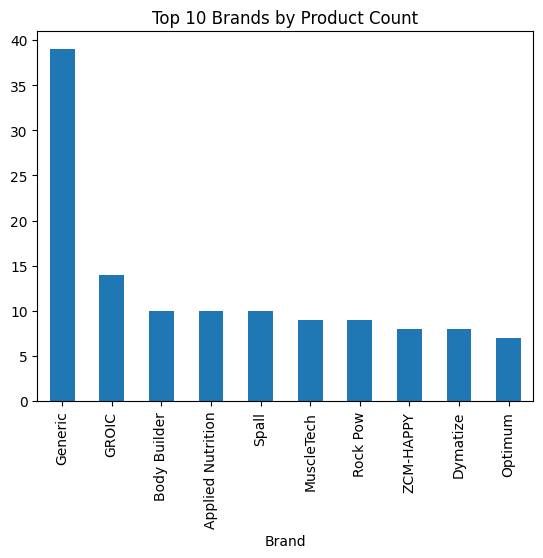

In [ ]:
import matplotlib.pyplot as plt
top_10_brand_counts.head(10).plot(kind='bar', title='Top 10 Brands by Product Count')
plt.show()

generic is the top brand

In [ ]:
scraped_df.head()

,Product_name,Brand,Avg_ratings,Ratings_count,Sponsored,Sale_price,Price,Express,Ranks,Categories,Links,SKU,BestSellers,Discounts,Extra_discounts
1,Optimum Nutrition Micronized Creatine Monohydr...,Optimum,4.2,377,No,90.00,102.45,n,1,Energy And Endurance Sports Nutrition,https://www.noon.com/uae-en/micronized-creatin...,N53418665A,Best Seller,12% Off,Extra 20% off!
4,MuscleTech Nitro Tech Whey Protein Milk Chocol...,MuscleTech,4.3,476,No,159.00,195.90,y,3,Protein Supplements,https://www.noon.com/uae-en/nitro-tech-whey-pr...,N13182595A,Best Seller,18% Off,Extra 20% off!
5,KEVIN LEVRONE Kevin Levrone Gold Creatine 300g...,KEVIN LEVRONE,4.4,278,No,48.30,150,y,1,Protein Supplements,https://www.noon.com/uae-en/kevin-levrone-gold...,N52267410A,Best Seller,67% Off,Extra 20% off!
7,Eworld Versatile 7-in-1 Adjustable Dumbbell Se...,Eworld,4.4,70,No,124.95,142.95,y,2,Dumbbells,https://www.noon.com/uae-en/versatile-7-in-1-a...,Z419E35B037EFE2CD6CC9Z,Best Seller,12% Off,Extra 20% off!
8,Optimum Nutrition Gold Standard 100% Whey Prot...,Optimum,4.5,158,No,122.00,143.65,n,2,Protein Supplements,https://www.noon.com/uae-en/gold-standard-100-...,N53418653A,Best Seller,15% Off,Extra 20% off!


In [ ]:
grouped_categories = scraped_df.groupby('Categories')['Sale_price'].mean().sort_values(ascending=False)

<Axes: xlabel='Categories'>

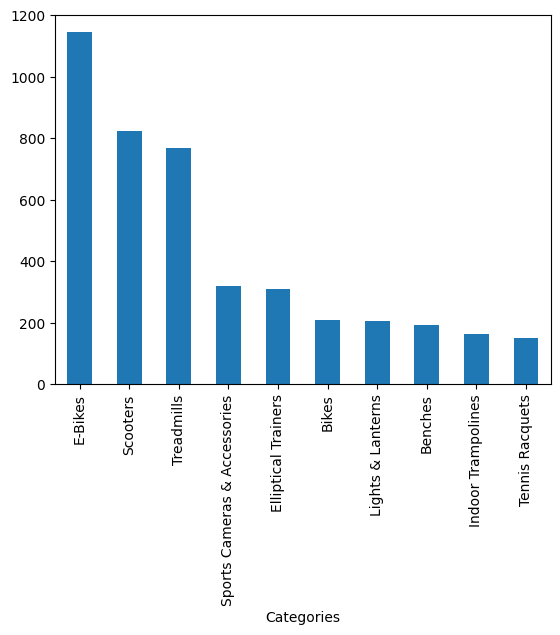

In [ ]:
grouped_categories.head(10).plot(kind='bar')

E-bikes has the highes sold price

In [ ]:
grouped_sponsors = scraped_df['Sponsored'].value_counts().reset_index()

In [ ]:
grouped_sponsors

,Sponsored,count
0,No,363
1,Yes,4


Text(0.5, 1.0, 'Sponsored distribution')

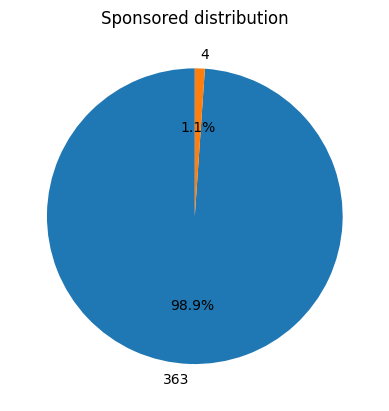

In [ ]:
plt.pie(grouped_sponsors.iloc[:,1], labels = grouped_sponsors.iloc[:,1], autopct='%1.1f%%', startangle=90)
plt.title("Sponsored distribution")

Most number of products are not sponsored

In [ ]:
scraped_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, 1 to 479
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product_name     367 non-null    object 
 1   Brand            367 non-null    object 
 2   Avg_ratings      367 non-null    float64
 3   Ratings_count    367 non-null    object 
 4   Sponsored        367 non-null    object 
 5   Sale_price       367 non-null    float64
 6   Price            367 non-null    object 
 7   Express          367 non-null    object 
 8   Ranks            367 non-null    int64  
 9   Categories       367 non-null    object 
 10  Links            367 non-null    object 
 11  SKU              367 non-null    object 
 12  BestSellers      367 non-null    object 
 13  Discounts        367 non-null    object 
 14  Extra_discounts  367 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 45.9+ KB


In [ ]:
scraped_df['Discounts'] = scraped_df['Discounts'].str.replace('% Off', '').str.replace(' ', '').astype(float)

In [ ]:
scraped_df['Extra_discounts'] = scraped_df['Extra_discounts'].str.replace('Extra ', '').str.replace('% off', '').str.replace('!', '').str.strip().astype(float)

In [ ]:
scraped_df['Price'] = scraped_df['Price'].str.replace(',','').astype(float)

In [ ]:
scraped_df.to_csv('scraped_df.csv')

Descreptive analysis

In [ ]:
basic_stats = scraped_df[['Sale_price', 'Price', 'Discounts']].describe().T
basic_stats

,count,mean,std,min,25%,50%,75%,max
Sale_price,367.0,133.163351,222.467252,8.90,34.75,66.0,124.475,1449.0
Price,367.0,214.181880,352.174229,12.55,54.50,110.0,199.950,2500.0
Discounts,367.0,33.711172,19.970428,5.00,16.00,30.0,48.000,78.0


In [ ]:
unique_counts = {
    'Unique Bands': scraped_df['Brand'].nunique(),
    'Unique Categories': scraped_df['Categories'].nunique()
}
print("Unique Counts:\n")
print(unique_counts)

Unique Counts:

{'Unique Bands': 161, 'Unique Categories': 112}


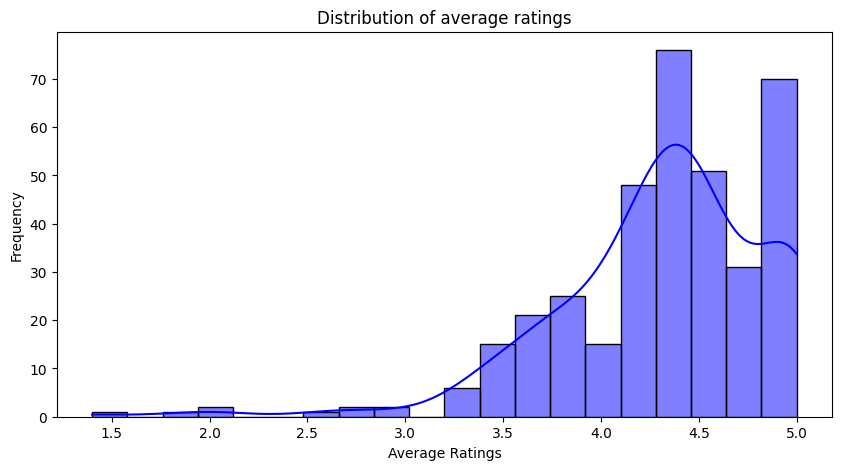

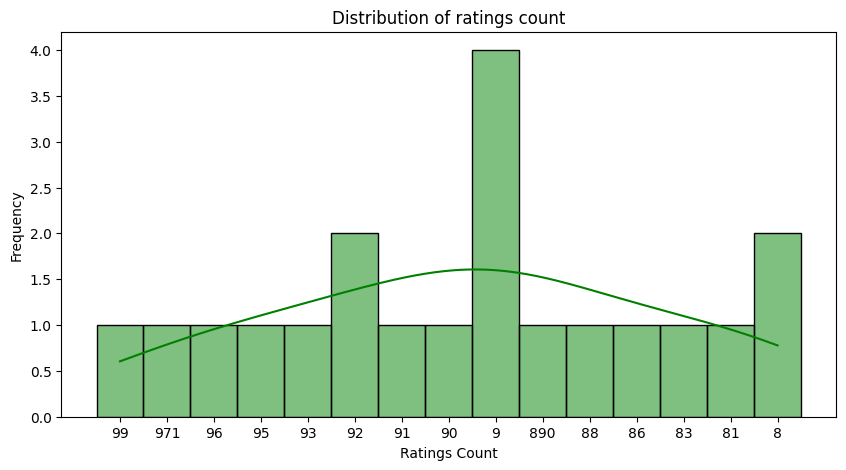

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(scraped_df['Avg_ratings'], bins=20, kde=True, color='blue')
plt.title('Distribution of average ratings')
plt.xlabel('Average Ratings')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(scraped_df['Ratings_count'].sort_values(ascending=False).head(20), bins=20, kde=True, color='green')
plt.title('Distribution of ratings count')
plt.xlabel('Ratings Count')
plt.ylabel('Frequency')
plt.show()

- most number of products have average ratings above 3.5
- most number of ratings counts are between 8 to 890

 Price vs. Sale Price: Analyze Discounts

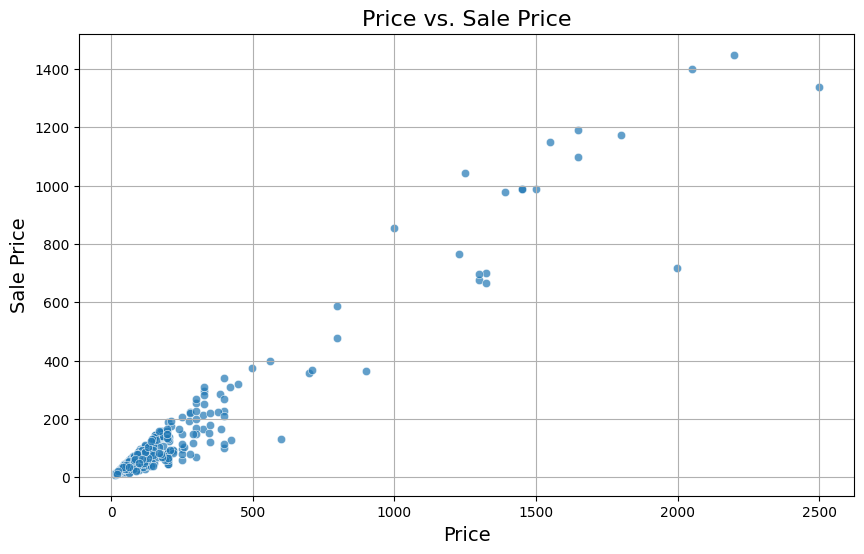

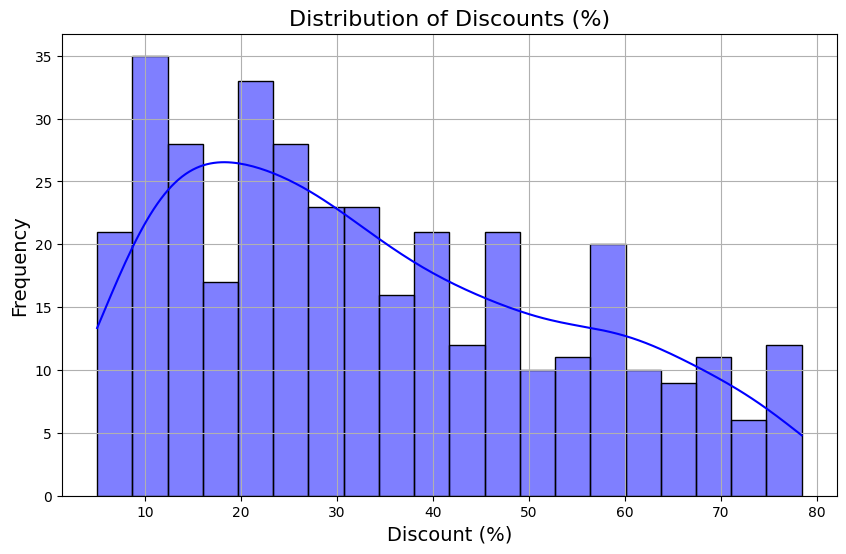

In [ ]:
scraped_df['Discount'] = ((scraped_df['Price'] - scraped_df['Sale_price']) / scraped_df['Price']) * 100

# Plot Price vs Sale Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=scraped_df, x='Price', y='Sale_price', alpha=0.7)
plt.title('Price vs. Sale Price', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Sale Price', fontsize=14)
plt.grid()
plt.show()

# Plot Distribution of Discounts
plt.figure(figsize=(10, 6))
sns.histplot(scraped_df['Discount'], kde=True, bins=20, color='blue')
plt.title('Distribution of Discounts (%)', fontsize=16)
plt.xlabel('Discount (%)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid()
plt.show()

- most products price and sale price are below 500
- Most products have discount (10% - 30%)

Ratings vs. Price: Analyze Avg_ratings with Price

<ipython-input-142-c0edf10eedc5>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=scraped_df, x='Price', y='Avg_ratings', sizes=(20, 200), palette='viridis', alpha=0.7)


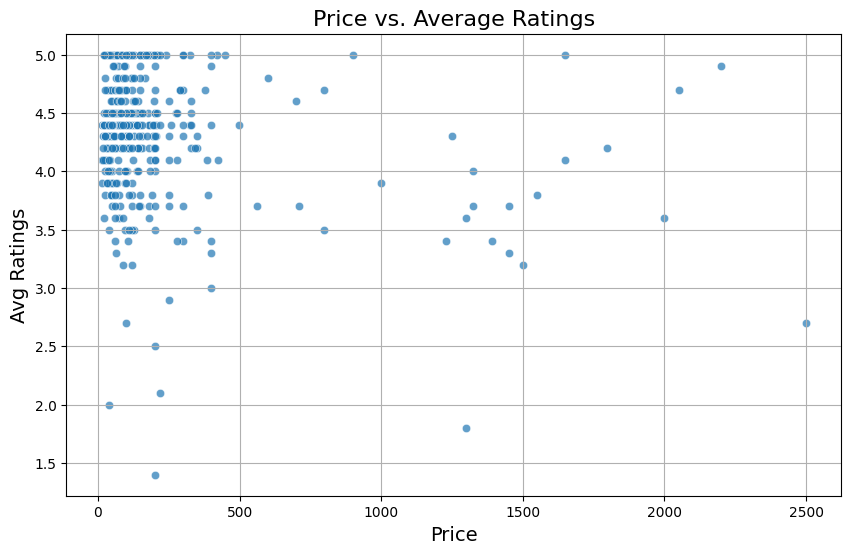

<ipython-input-142-c0edf10eedc5>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=scraped_df, x=pd.qcut(scraped_df['Price'], q=4), y='Avg_ratings', palette='Set2')


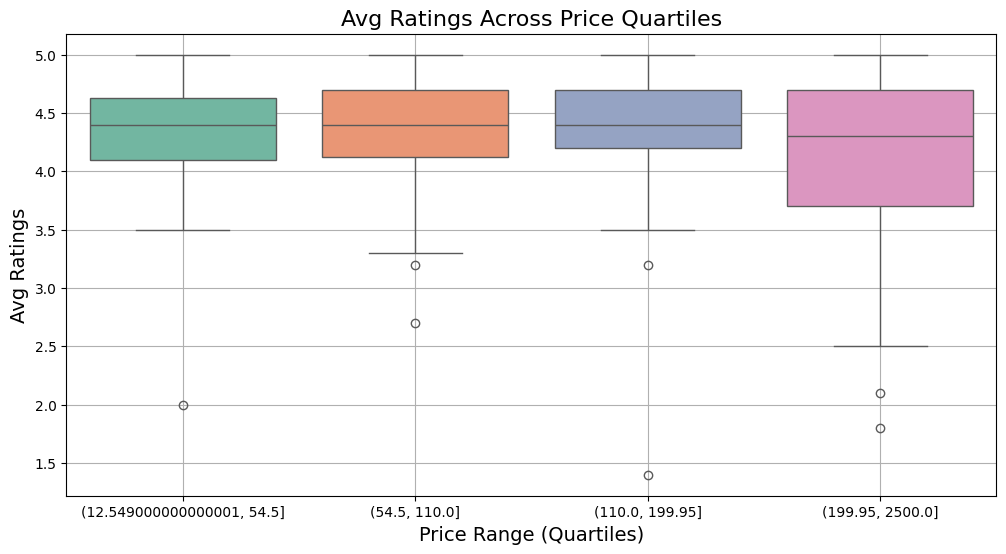

In [ ]:
# Scatter plot: Avg_ratings vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=scraped_df, x='Price', y='Avg_ratings', sizes=(20, 200), palette='viridis', alpha=0.7)
plt.title('Price vs. Average Ratings', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Avg Ratings', fontsize=14)
# plt.colorbar(label='Ratings_count')
plt.grid()
plt.show()

# Boxplot to see the distribution of Avg_ratings across Price ranges
plt.figure(figsize=(12, 6))
sns.boxplot(data=scraped_df, x=pd.qcut(scraped_df['Price'], q=4), y='Avg_ratings', palette='Set2')
plt.title('Avg Ratings Across Price Quartiles', fontsize=16)
plt.xlabel('Price Range (Quartiles)', fontsize=14)
plt.ylabel('Avg Ratings', fontsize=14)
plt.grid()
plt.show()


- most products have avg ratings above 3.5 and price is also less than 500 for most products.

Brand vs Average price and discount analysis

<ipython-input-151-28d8626748ee>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=brand_analysis.sort_values('Avg_Price', ascending=False), x='Brand', y='Avg_Price', palette='coolwarm')


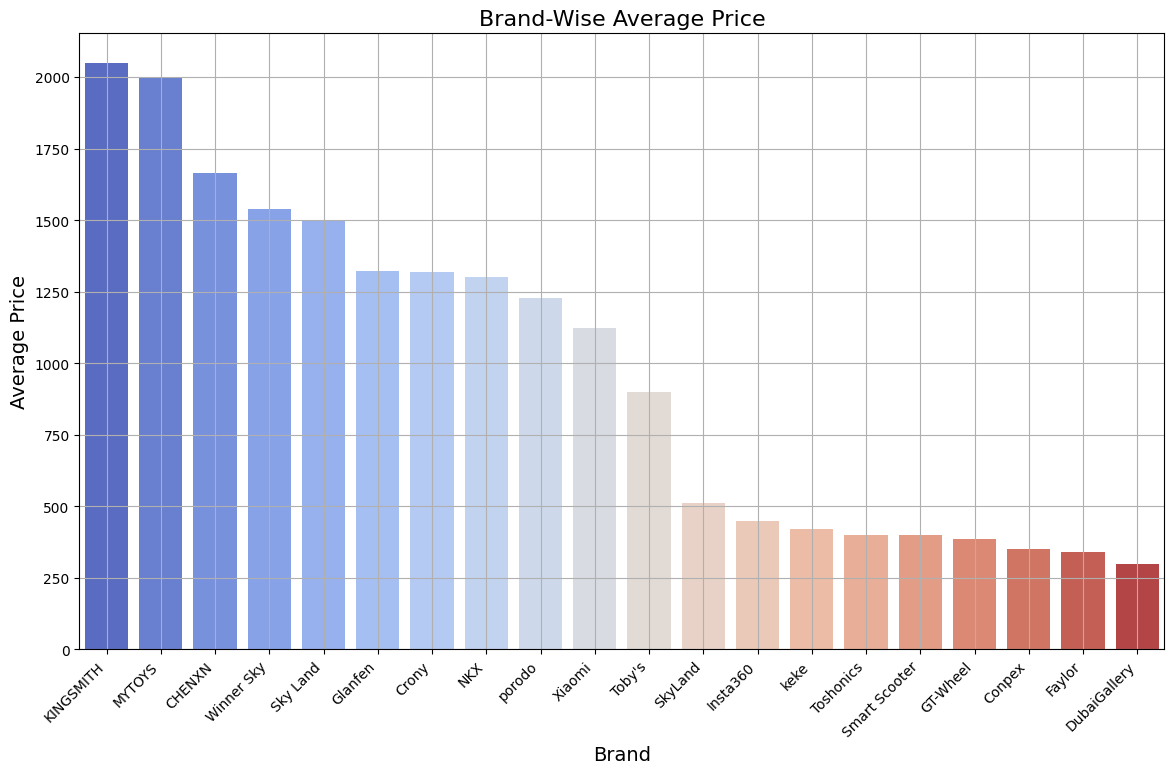

<ipython-input-151-28d8626748ee>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=brand_analysis.sort_values('Avg_Discount', ascending=False), x='Brand', y='Avg_Discount', palette='Spectral')


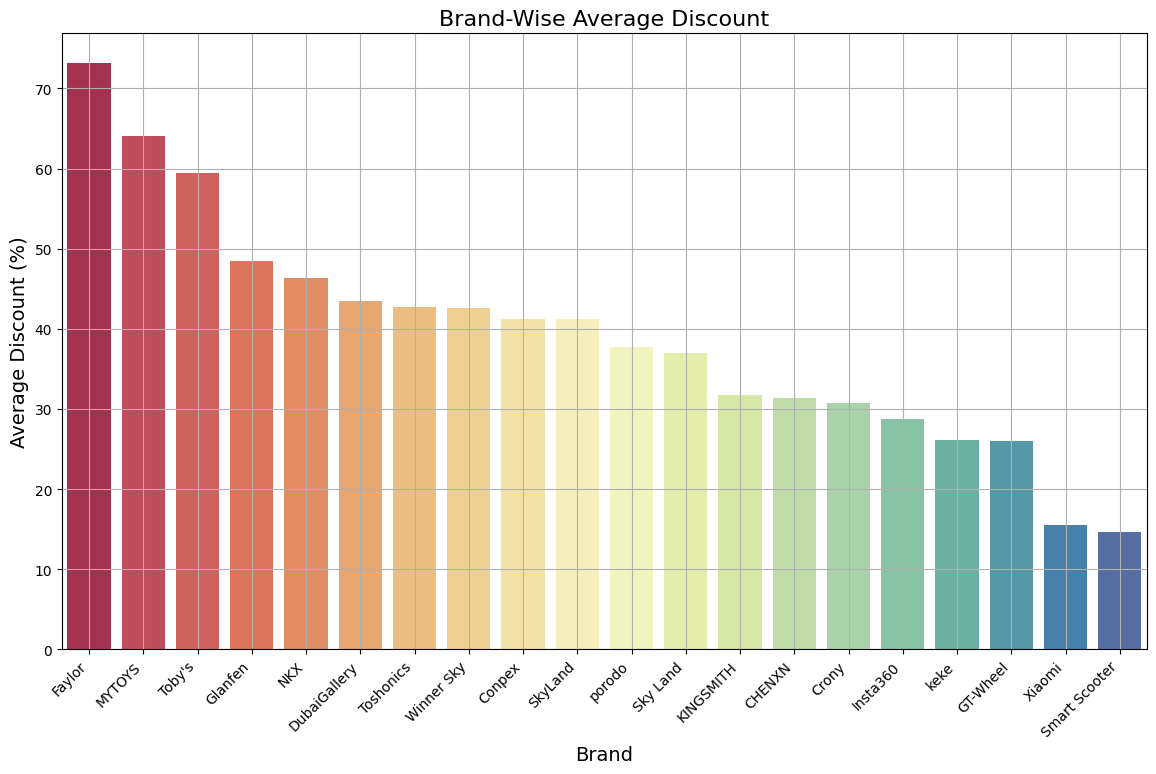

In [ ]:
# Calculate Brand-wise average price and discount
brand_analysis = scraped_df.groupby('Brand').agg(
    Avg_Price=('Price', 'mean'),
    Avg_Discount=('Discount', 'mean'),
    Product_Count=('Brand', 'count')
).reset_index().sort_values(by='Avg_Price', ascending=False).head(20)

# Plot Brand-wise Average Price
plt.figure(figsize=(14, 8))
sns.barplot(data=brand_analysis.sort_values('Avg_Price', ascending=False), x='Brand', y='Avg_Price', palette='coolwarm')
plt.title('Brand-Wise Average Price', fontsize=16)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.show()

# Plot Brand-wise Average Discount
plt.figure(figsize=(14, 8))
sns.barplot(data=brand_analysis.sort_values('Avg_Discount', ascending=False), x='Brand', y='Avg_Discount', palette='Spectral')
plt.title('Brand-Wise Average Discount', fontsize=16)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Average Discount (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.show()


- from above graph we can say that, Kingsmith brand has most average price than others i.e costly products.
- And, Faylor brand has highest average discount than others.

Discount impact on avg_ratings and ratings_count

In [ ]:
scraped_df['Discount_Percentage'] = ((scraped_df['Price'] - scraped_df['Sale_price']) / scraped_df["Price"]) * 100

<ipython-input-159-6711357b64ad>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=scraped_df, x='Discount_Percentage', y='Avg_ratings', palette='viridis', sizes=(20, 200))


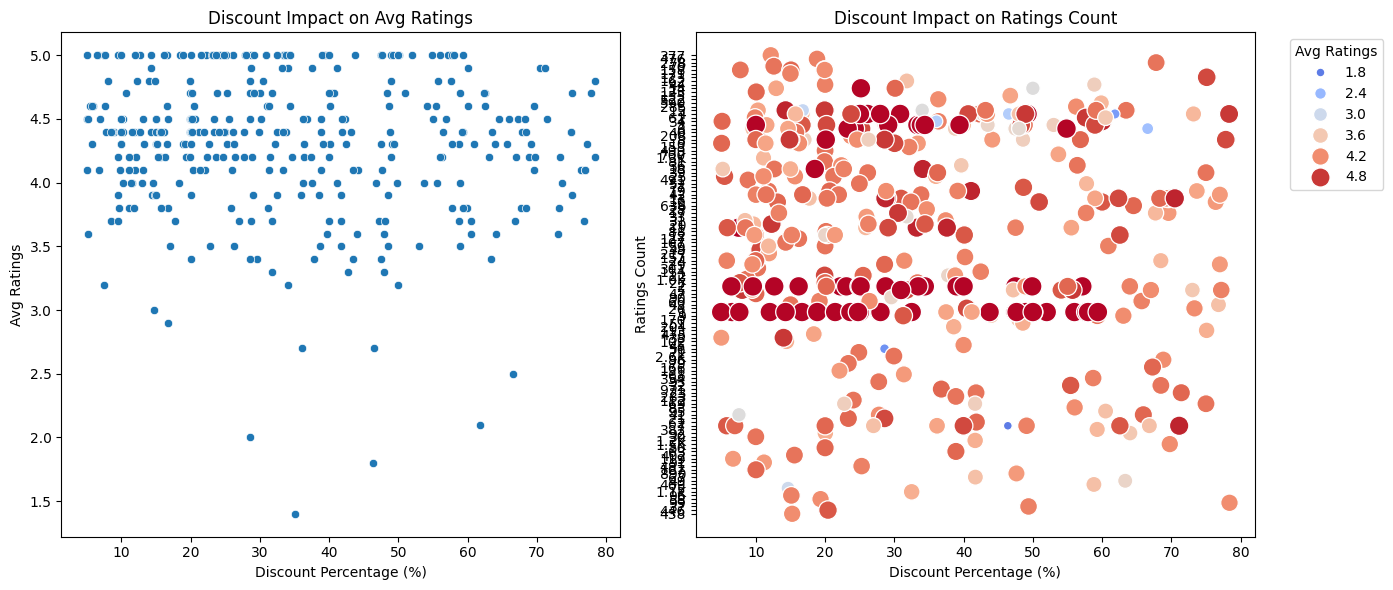

In [ ]:
plt.figure(figsize=(14, 6))

# Discount vs Avg_ratings
plt.subplot(1, 2, 1)
sns.scatterplot(data=scraped_df, x='Discount_Percentage', y='Avg_ratings', palette='viridis', sizes=(20, 200))
plt.title('Discount Impact on Avg Ratings')
plt.xlabel('Discount Percentage (%)')
plt.ylabel('Avg Ratings')
# plt.legend(title='Ratings Count', bbox_to_anchor=(1.05, 1), loc='upper left')

# Discount vs Ratings_count
plt.subplot(1, 2, 2)
sns.scatterplot(data=scraped_df, x='Discount_Percentage', y='Ratings_count', hue='Avg_ratings', size='Avg_ratings', palette='coolwarm', sizes=(20, 200))
plt.title('Discount Impact on Ratings Count')
plt.xlabel('Discount Percentage (%)')
plt.ylabel('Ratings Count')
plt.legend(title='Avg Ratings', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


- discount doesnt affect much on average ratings

performance of sponsored vs non-sponsored products

In [ ]:
scraped_df['Ratings_count'] = scraped_df['Ratings_count'].str.replace('K', '').astype(float)

<ipython-input-172-a2e528bd66e4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped.index, y=grouped['Avg_ratings'], ax=ax[0], palette='pastel')
<ipython-input-172-a2e528bd66e4>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped.index, y=grouped['Ratings_count'], ax=ax[1], palette='muted')


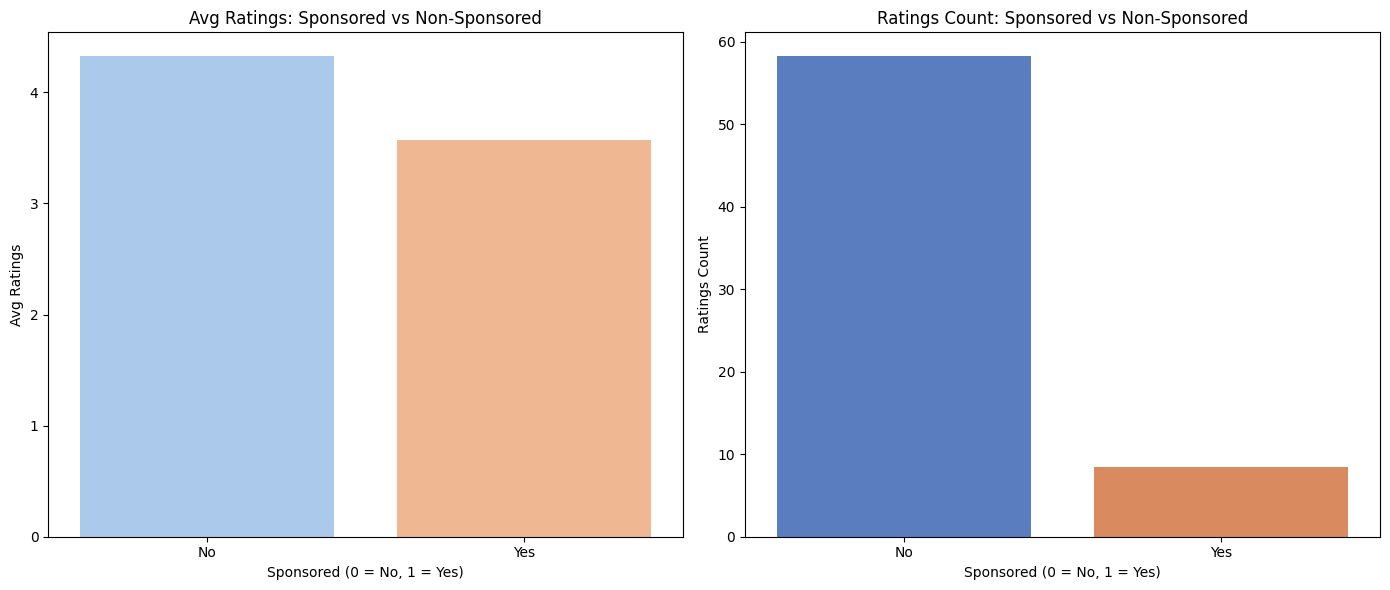

In [ ]:
grouped = scraped_df.groupby('Sponsored')[['Avg_ratings', 'Ratings_count']].mean()

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Avg_ratings comparison
sns.barplot(x=grouped.index, y=grouped['Avg_ratings'], ax=ax[0], palette='pastel')
ax[0].set_title('Avg Ratings: Sponsored vs Non-Sponsored')
ax[0].set_xlabel('Sponsored (0 = No, 1 = Yes)')
ax[0].set_ylabel('Avg Ratings')

# Ratings_count comparison
sns.barplot(x=grouped.index, y=grouped['Ratings_count'], ax=ax[1], palette='muted')
ax[1].set_title('Ratings Count: Sponsored vs Non-Sponsored')
ax[1].set_xlabel('Sponsored (0 = No, 1 = Yes)')
ax[1].set_ylabel('Ratings Count')

plt.tight_layout()
plt.show()

- Products which are not sponsored has more avg ratings and rating counts

Categories wise average ratings and total ratings count

In [ ]:
category_insights = scraped_df.groupby('Categories').agg(
    avg_rating=('Avg_ratings', 'mean'),
    total_ratings=('Ratings_count', 'sum')
).sort_values('total_ratings', ascending=False).head(5)
category_insights

,avg_rating,total_ratings
Categories,,
Protein Supplements,4.400000,2713.0
Dumbbells,4.305882,1961.0
Fitness Accessories,4.050000,1594.2
Sports Water Bottles,4.500000,1409.0
Football Accessories,4.433333,1213.0


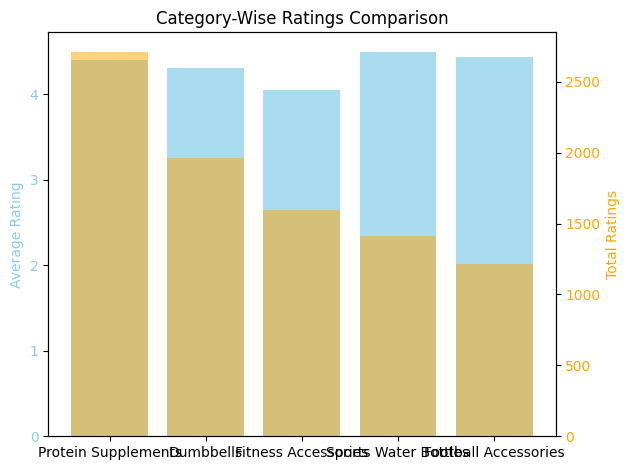

In [ ]:
categories = category_insights.index
avg_ratings = category_insights['avg_rating']
total_ratings = category_insights['total_ratings']

fig, ax1 = plt.subplots()

# First y-axis for avg_ratings
ax1.bar(categories, avg_ratings, color='skyblue', label='Average Rating', alpha=0.7)
ax1.set_ylabel('Average Rating', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Second y-axis for total_ratings
ax2 = ax1.twinx()
ax2.bar(categories, total_ratings, color='orange', label='Total Ratings', alpha=0.5)
ax2.set_ylabel('Total Ratings', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Title and x-axis
plt.title('Category-Wise Ratings Comparison')
plt.xticks(rotation=55)  # Rotate category labels
plt.tight_layout()  # Adjust layout

# Show plot
# plt.xticks(rotation=45)
plt.show()


- Protien supplements have more total ratings
- Sports water bottles have more avg ratings

Analysis of ranks

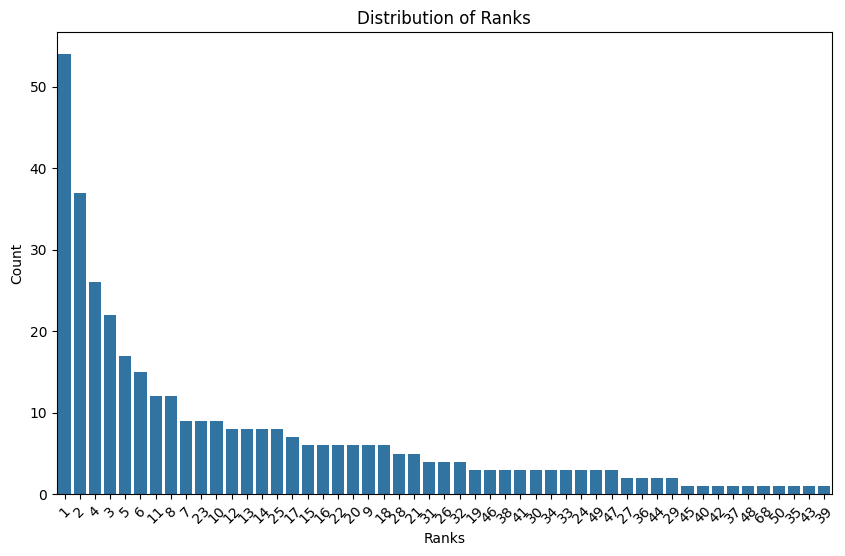

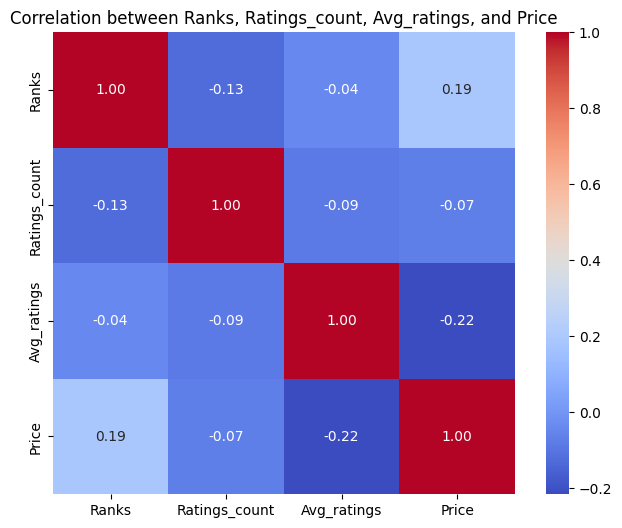

In [ ]:
# Distribution of Ranks
plt.figure(figsize=(10, 6))
sns.countplot(data=scraped_df, x='Ranks', order=scraped_df['Ranks'].value_counts().index)
plt.title('Distribution of Ranks')
plt.xlabel('Ranks')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Correlation Matrix
correlation_matrix = scraped_df[['Ranks', 'Ratings_count', 'Avg_ratings', 'Price']].corr()

# Heatmap for correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation between Ranks, Ratings_count, Avg_ratings, and Price')
plt.show()

- Most products have been ranked 1
- Also correlation between price and rank is slighlty positive and rest all are negatively correlated

# **Conclusion**

The analysis highlights that most products are affordable, with Price and Sale_price typically below 500, and discounts (10%-30%) are common but do not significantly influence ratings. Non-sponsored products perform better in terms of ratings and engagement. Generic is the leading brand, while Kingsmith offers premium-priced products, and Faylor attracts with high discounts. Categories like e-bikes and protein supplements stand out in price and ratings, respectively. The correlation between price and rank is slightly positive, and most products achieve ratings above 3.5, reflecting overall customer satisfaction.